In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


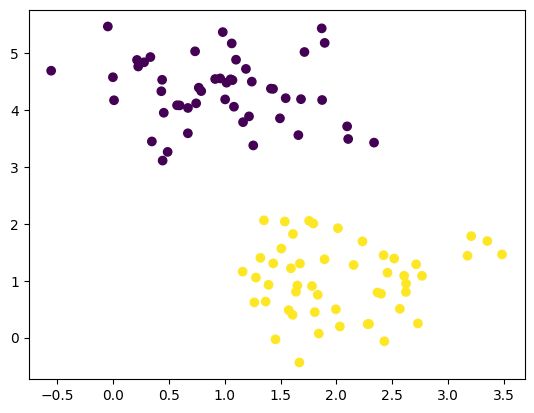

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100,
                  centers =2,
                  random_state=0,
                  cluster_std=0.6)

plt.scatter(X[:, 0], X[:, 1], c=y);

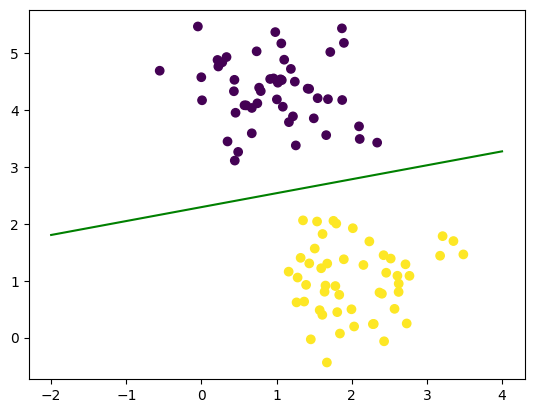

m: 0.2
c: -2.3


In [3]:
#Applying Logistic regression on above data
from sklearn.linear_model import LogisticRegression 

clf =LogisticRegression(random_state=0).fit(X, y) 
W, b = clf.coef_[0], clf.intercept_

xfit = np.linspace(-2, 4, 5) 
yfit = -(W[0]*xfit + b)/W[1]

plt.scatter(X[:, 0], X[:, 1], c=y) 
plt.plot(xfit, yfit, color="g")
plt.show()

m, c = -W[0]/W[1], b[0]/W[1] # calculate slope and intercept of the Line 
print("m:", np.round(m, 1)) 
print("c:", np.round(c, 1))


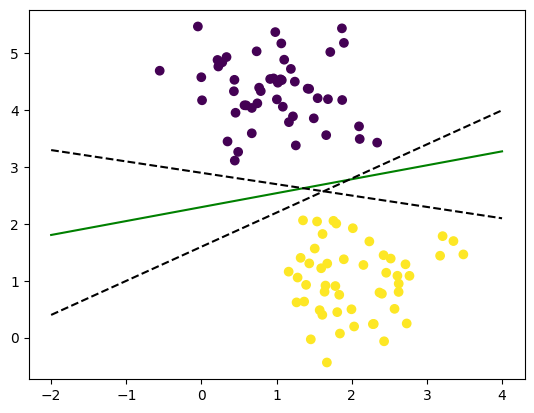

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y) 
plt.plot(xfit, yfit, color='g')

#consider two line parameter

for m_i, b_i in [(0.6, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m_i * xfit + b_i, "--", c="black")

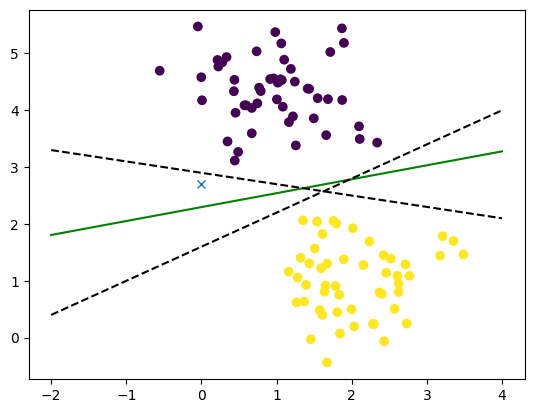

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y) 
plt.plot(xfit, yfit, color='g')

#consider two line parameter

for m_i, b_i in [(0.6, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m_i * xfit + b_i, "--", c="k")
plt.plot(0, 2.7 , "x")
plt.show()

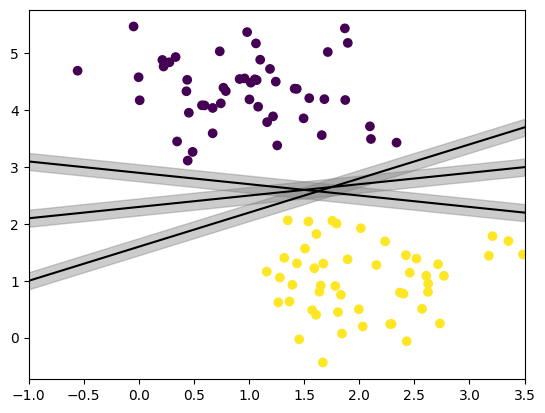

In [6]:
xfit=np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y)
d = 0.15

line_no = 1

for m, c in [(0.6, 1.6), (-0.2, 2.9), (0.2, 2.3)]:
    yfit =m * xfit + c
    plt.plot(xfit, yfit, '-k') 
    plt.fill_between(xfit, yfit-d, yfit+d, edgecolor='none', color='grey', alpha=0.4)
plt.xlim(-1, 3.5);

# save xlim in and ylim in a variable, will be used later

ax =plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()


In [7]:
from sklearn.svm import SVC
model = SVC(kernel='linear' , C=1E10) # will discuss these paramteres later
model.fit(X , y);

In [8]:
model.support_vectors_   #these 3 observations has been picked by SV classifier as Support Vector

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [1.35139348, 2.06383637]])

In [9]:
np.round(model.decision_function(model.support_vectors_) , 2)

array([-1., -1.,  1.])

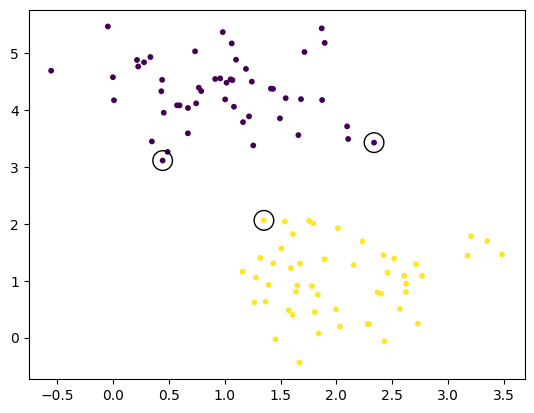

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=10) #45-10 to decrease the size of points 
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
             s=200, facecolors='none', edgecolors='k');


In [11]:
# create grid to evaluate model for all the points in 2D plane 
xfit = np.linspace(xlim[0], xlim[1], 30)
yfit = np.linspace(ylim[0], ylim[1], 30)
Y_grid, X_grid =np.meshgrid(yfit, xfit) 
xy = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T 
print(xy.shape) #xy contains all the data-points in the 2D plane


(900, 2)


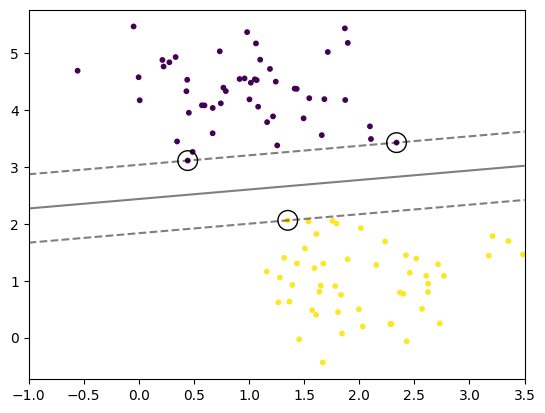

In [12]:
def plot_svc_decision_function(model, ax=None): 
    """Plot the decision function for a 20 SV"""
    if ax is None:
        ax = plt.gca()

    P = model.decision_function(xy).reshape(X_grid.shape) # reshape the result as a grid 
    #plot decision boundary and margins 
    plt.contour(X_grid, Y_grid, P, colors='k',
                levels=[-1, 0, 1], alpha=0.5, linestyles=['--','-' , '--'])

plt.scatter(X[:, 0], X[:, 1], c=y, s=10)
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1], 
            s=200, facecolors='none', edgecolors='k');
plot_svc_decision_function (model, ax);


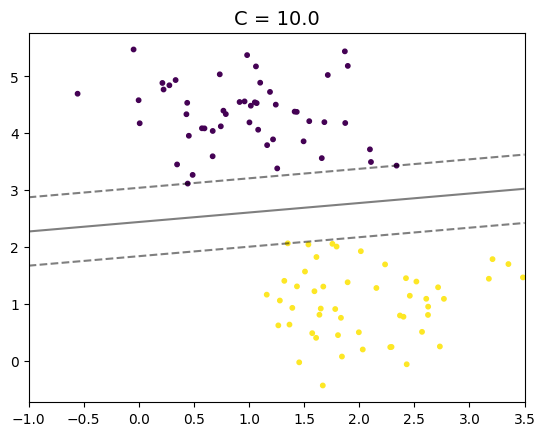

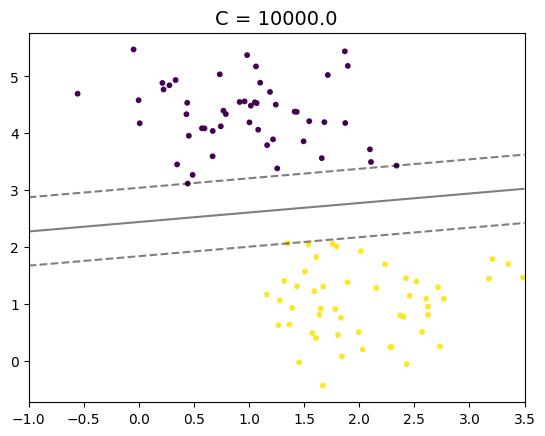

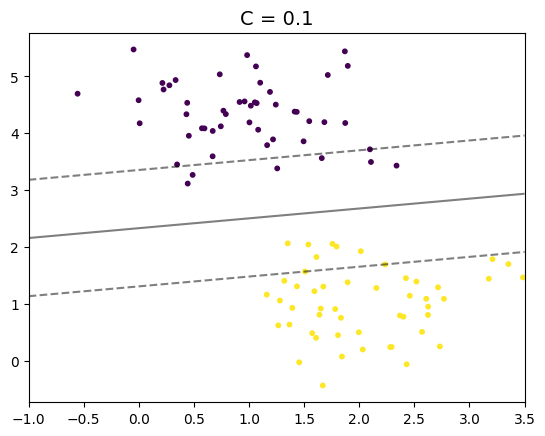

In [13]:
for C in [10 , 10000 , 0.1]:
    plt.figure()
    model=SVC(kernel='linear' , C=C).fit(X , y)
    plt.scatter(X[:, 0] , X[:, 1] , c=y , s=10)
    plot_svc_decision_function(model)
    plt.title('C = {0:.1f}'.format(C), size=14)

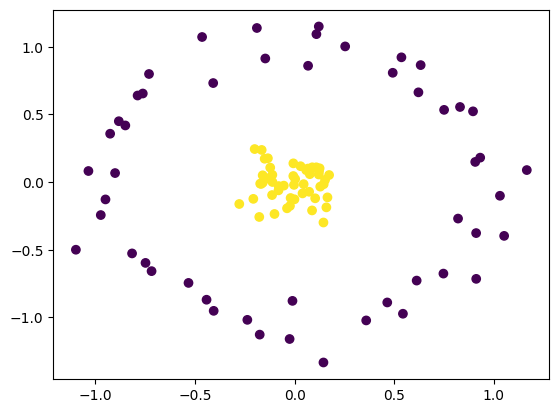

In [14]:
#create a linear datasets
from sklearn.datasets import make_circles
X , y=make_circles(100 , factor=.1 , noise=.1 , random_state=0)
plt.scatter(X[:,0] , X[:, 1] , c=y)
plt.show()

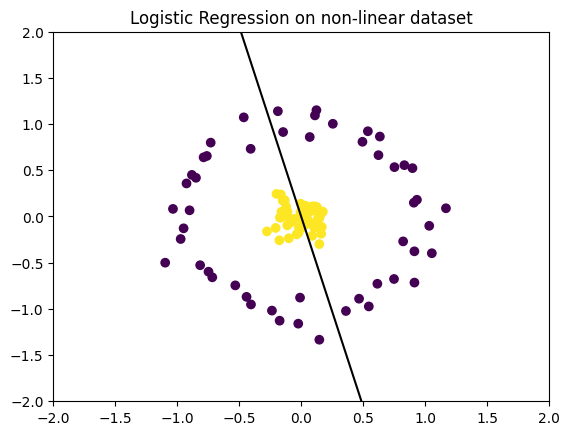

In [16]:
# try using logistic regression 
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression(random_state=0).fit(X, y)
W, b= clf.coef_[0], clf.intercept_
plt.figure()
xfit = np.linspace(-2, 4, 5)
yfit = -(W[0]*xfit + b)/W[1]
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(xfit, yfit, c="k")
plt.title("Logistic Regression on non-linear dataset")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()


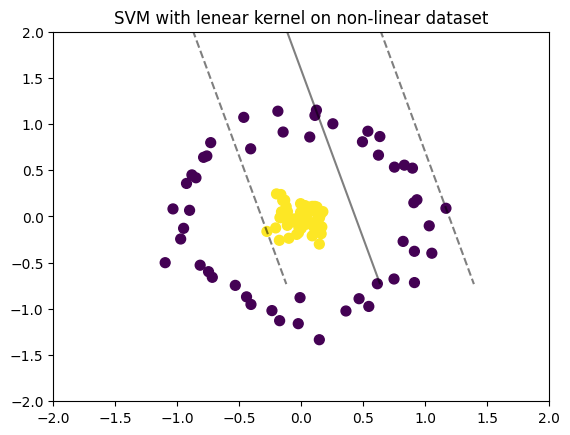

In [18]:
#try using svm with linear kernel
clf=SVC(kernel='linear').fit(X , y)
plt.scatter(X[:, 0], X[:, 1], c=y , s=50)
plt.title("SVM with lenear kernel on non-linear dataset")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plot_svc_decision_function(clf)



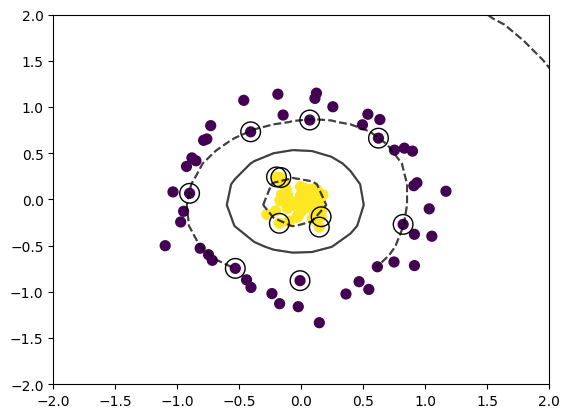

In [19]:
clf=SVC(kernel='rbf').fit(X , y)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y , s=50) #plot data
plot_svc_decision_function(clf) #plot decision boundary and margins
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200 , facecolors="none" , edgecolors="k")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plot_svc_decision_function(clf)

